# Preprocessing

### Access the dataset from here :

https://drive.google.com/file/d/1XztaPmhMMhBoEp7XuyDGS5Il_kLUlEEl/view?usp=sharing

### Notes:
* This exam consists of a **Regression** problem.  
* The **target** feature is '**cltv**'.
* **Random state** should be taken as **42** wherever applicable.

In [1]:

import pandas as pd
import numpy as np
np.random.seed(42)
df = pd.read_csv("V1.csv")


In [2]:
df.head()  # Display the first few rows of the DataFrame

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,27529,Male,Urban,High School,42.99,0,0,3849.0,1,A,Platinum,66816
1,27116,Male,Rural,Bachelor,5.33,1,6,3006.0,More than 1,A,Gold,67164
2,6499,Female,Urban,High School,2.26,1,2,NaN,More than 1,A,Platinum,68076
3,61863,Male,Rural,High School,20.29,1,8,2844.0,More than 1,A,Platinum,63276
4,25045,Female,Urban,High School,5.63,0,6,6370.0,More than 1,A,Platinum,245844


# Metadata

1. **id**-Unique identifier of a customer  
2. **gender**-Gender of the customer   
3. **area**-Area of the customer   
4. **qualification**-Highest Qualification of the customer  
5. **income**-Income earned in a year (in rupees).   
6. **marital_status**- 0:Single, 1: Married
7. **vintage**-No. of years since the first policy date.  
8. **claim_amount**-Total Amount Claimed by the customer (in rupees)
9. **num_policies**-Total no. of policies issued by the customer
10. **policy**-Active policy of the customer
11. **type_of_policy**-Type of active policy
12. **cltv**- Customer life time value. It is the total amount of money a customer is expected to spend with your business, or on your products, during the lifetime of an average business relationship. **[TARGET]**

### Q.2 [Marks: 2] How many total number of features (excluding target variable) are there in the dataset?
Options

A) 1000

B) 11

C) 12

D) 10

`Ans: 11 input features`

In [3]:
# Solution

df.shape[1]-1

11

### Q.3 [Marks: 2] What are the unique values of feature `Types of Policy` in the dataset?

A) ['Bronze', 'Gold']

B) ['Gold', 'Silver']

C) ['Platinum', 'Gold', 'Silver', 'Bronze]

D) ['Platinum', 'Gold', 'Silver']


`Ans: ['Platinum', 'Gold', 'Silver'](D)`

In [5]:
df.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [4]:
# Solution
df['type_of_policy'].unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

### Q.4 [Marks: 3] Which of the following columns have categorical data?[MSQ]

A) income

B) id

C) area

D) claim_amount

E) qualification

`Ans: area (C), qualification (E)`

In [8]:
# Solution
df.select_dtypes(include=['object']).columns

Index(['gender', 'area', 'qualification', 'num_policies', 'policy',
       'type_of_policy'],
      dtype='object')

### Q.5 [Marks: 4] Plot the `heatmap` and mark the pair which has the highest positive correlation value. [MCQ]

A) claim_amount & income

B) income & cltv

C) vintage & income.

D) claim_amount & cltv.

`Ans: claim_amount and cltv (D)`

In [13]:
df["gender"].value_counts()

gender
Male      3569
Female    2688
Name: count, dtype: int64

In [15]:
df["gender"] = df["gender"].map(lambda x: 1 if x == "Male" else 0)

In [19]:
df['area'].value_counts()

area
Urban    4118
Rural    1755
Name: count, dtype: int64

In [4]:
df1 = df.copy()

In [5]:
for col in df1.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in gender: ['Male' 'Female']
Unique values in area: ['Urban' 'Rural' nan]
Unique values in qualification: ['High School' 'Bachelor' 'Others']
Unique values in num_policies: ['1' 'More than 1']
Unique values in policy: ['A' 'B' 'C' nan]
Unique values in type_of_policy: ['Platinum' 'Gold' 'Silver']


In [6]:
for col in df1.select_dtypes(include=['object']).columns:
   df1[col] = df1[col].astype("category").cat.codes

In [ ]:
for col in df1.select_dtypes(include=["category"]).columns:
    print(f"Unique values in {col}: {df1[col].unique()}")

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df1.select_dtypes(include=['object']).columns:
   df1[col] = LabelEncoder().fit_transform(df[col])

In [7]:
df.head()  # Display the first few rows of the DataFrame

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,27529,Male,Urban,High School,42.99,0,0,3849.0,1,A,Platinum,66816
1,27116,Male,Rural,Bachelor,5.33,1,6,3006.0,More than 1,A,Gold,67164
2,6499,Female,Urban,High School,2.26,1,2,NaN,More than 1,A,Platinum,68076
3,61863,Male,Rural,High School,20.29,1,8,2844.0,More than 1,A,Platinum,63276
4,25045,Female,Urban,High School,5.63,0,6,6370.0,More than 1,A,Platinum,245844


In [8]:
df1.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,27529,1,1,1,42.99,0,0,3849.0,0,0,1,66816
1,27116,1,0,0,5.33,1,6,3006.0,1,0,0,67164
2,6499,0,1,1,2.26,1,2,NaN,1,0,1,68076
3,61863,1,0,1,20.29,1,8,2844.0,1,0,1,63276
4,25045,0,1,1,5.63,0,6,6370.0,1,0,1,245844


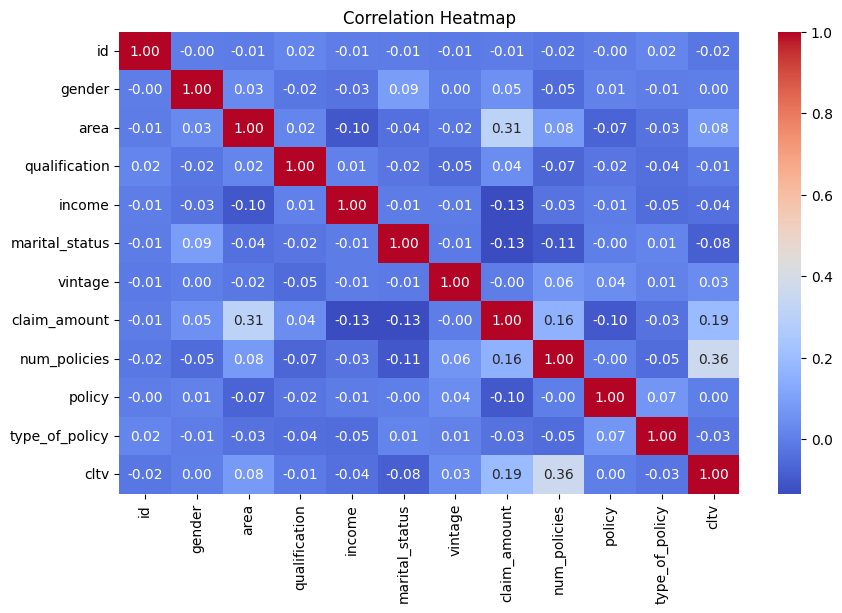

In [9]:
# Solution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Q.6 [Marks: 2] Which of the following features have `missing` values?[MSQ]

Options:

A) gender

B) area

C) qualification

D) income

E) claim_amount

F) policy

`Ans: area(B), income(D), claim_amount(E), policy(F)`

In [11]:
# Solution
df.isna().sum()

id                  0
gender              0
area              384
qualification       0
income            401
marital_status      0
vintage             0
claim_amount      360
num_policies        0
policy            372
type_of_policy      0
cltv                0
dtype: int64

### Q.7 [Marks: 4] Break the dataset into features(`X`) and label (`y`), where the column `cltv` goes to `y` and the rest of the columns go to `X`. Enter the avg value of `cltv` column? [NAT]


`Ans: 97788.08`

In [13]:
df.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [3]:
# Solution
x = df.drop(columns=["cltv"])
y = df["cltv"]

y.mean().round(2)

np.float64(97788.08)

### Q.8 [Marks : 3] Split the dataset into training and test dataset using `train_test_split` into `70:30` ratio while keeping random_state =42. What is the shape of the training set (X_train) ? [MCQ]


A) (4379, 11)

B) (4392, 13)

C) (4340, 11)

D) (4379, 15)

`Ans: (4379, 11) (A)`

In [4]:
# Solution
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
x_train.shape

(4379, 11)

### Q.9 [Marks: 2] Drop(remove) `id` column from train and test data because it is not useful in model training. Now how many feature columns are remaining in the training dataset? [NAT]

`Ans: 10 features`

In [ ]:
# Solution
x_train.drop(columns=["id"], inplace=True)
x_test.drop(columns=["id"], inplace=True)
x_train.shape[1]

### Q.10 [Marks: 2] Compute and write median of the `income` column of X_train while ignoring the missing values. Replace all NaN values in the income column of X_train and X_test by the median  computed from the X_train (upto two decimal). [NAT].

`Ans: 7.04`

In [6]:
# Solution
x_train['income'].median()

np.float64(7.04)

### Q.11 [Marks: 2] Which is the most frequent value in the `policy` column of X_train? Replace all NaN value in `policy` column of X_train and X_test by most frequent value in X_train [MCQ]

A) 'A'

B) 'B'

C) 'C'

D) None of the above

`Ans: A`

In [62]:
df["policy"].value_counts()

policy
A    3675
B    1657
C     553
Name: count, dtype: int64

In [63]:
# Solution
x_train["policy"].value_counts()

policy
A    2583
B    1160
C     392
Name: count, dtype: int64

In [7]:
x_train["policy"] = x_train["policy"].fillna("A")

In [8]:
x_test["policy"] = x_test["policy"].fillna("A")

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

# Impute 'policy' column in x_train
x_train['policy'] = imputer.fit_transform(x_train[['policy']]).ravel()

# Impute 'policy' column in x_test using the same imputer
x_test['policy'] = imputer.transform(x_test[['policy']]).ravel()

### Q.12 [Marks: 2] Which is the most frequent value in the `area` column of X_train? Replace all NaN value in `area` column of X_train and X_test by most frequent value from X_train [MCQ]

A) 'Urban'

B) 'Rural'

C) 'Semi-Urban'

D) None of the above

`Ans: Urban (A)`

In [10]:
# Solution
from sklearn.impute import SimpleImputer

print(x_train["area"].value_counts())

imputer = SimpleImputer(strategy='most_frequent')

# Impute 'policy' column in x_train
x_train['area'] = imputer.fit_transform(x_train[['area']]).ravel()

# Impute 'policy' column in x_test using the same imputer
x_test['area'] = imputer.transform(x_test[['area']]).ravel()

area
Urban    2920
Rural    1191
Name: count, dtype: int64


### Q.13 [Marks: 2] Replace all NaN value in claim_amount column of X_train and X_test by 0 (Zero). After Replacing NAN values from claim_amount column what is the standard deviation of claim_amount column in X_train. (correct upto two decimal places) [NAT]

`Ans: 3358.66`

In [11]:
# Solution
x_train["claim_amount"] = x_train["claim_amount"].fillna(0)
x_test["claim_amount"] = x_test["claim_amount"].fillna(0)
x_train["claim_amount"].std().round(2)

np.float64(3358.66)

### Q.14 [Marks: 4] Apply `MinMaxScaler` on `income` column of X_train. Compute and write median of `income` column? (correct Upto 2 decimal)[NAT]

`Ans: 0.07`

In [12]:
# Solution
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train["income"] = scaler.fit_transform(x_train[["income"]]).ravel()
x_test["income"] = scaler.transform(x_test[["income"]]).ravel()
x_train["income"].median().round(2)

np.float64(0.07)

## Apply preprocessing on features of X_train and X_test dataset.

### For Categorical Features

* Apply OneHotEncoding from `sklearn` library on all categorical features(object columns). Do Encoding in the order of following list

  `Categorical Features = ['gender', 'area','qualification','marital_status', 'num_policies', 'policy', 'type_of_policy']`

Lets call the transformed caterical feature matrix $X1$

### For Numerical Features

- apply MinMaxScaler and transform the dataset. Do scaling in the order of following list:

  `Numerical Features =  [ 'income', 'vintage', 'claim_amount' ]`


  - Lets call the transformed numerical feature matrix $X2$

### **Concatenate**(One Hot Encoded Features, Scaled Numerical Features)

After combining transformed categorical feature($X_1$) matrix and transformed numerical feature matrix ($X_2$) (side by side in that order), the output will be $X=[X_1 X_2]$

### Hints
* Apply ColumnTransformer to encode categorical columns and scaling on numerical columns with required preprocessor

* Another way is to separately encode all categorical columns and scale numerical columns and do concatenate (`h-stack`) both. keep categorical columns in front of numerical while concatenating.


* The transformed (as desribed by above steps) X_train and X_test, should be considered as X_train and X_test henceforth.


In [13]:
x_train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
1292,9728,Female,Urban,High School,0.084077,0,8,9538.0,1,A,Platinum
70,51597,Female,Urban,High School,0.788656,0,3,0.0,More than 1,A,Platinum
5453,82031,Female,Rural,High School,0.056218,1,5,2555.0,More than 1,C,Platinum
1305,22349,Male,Urban,High School,0.095501,0,1,10791.0,More than 1,A,Platinum
3207,537,Female,Urban,High School,0.822227,0,5,7489.0,More than 1,A,Gold
...,...,...,...,...,...,...,...,...,...,...,...
3772,28753,Male,Urban,Bachelor,0.008117,0,7,6033.0,More than 1,B,Platinum
5191,17977,Female,Urban,High School,0.037178,1,6,4565.0,More than 1,A,Silver
5226,12429,Male,Rural,Bachelor,0.083175,0,6,0.0,More than 1,A,Gold
5390,86702,Female,Urban,High School,0.061529,0,8,9855.0,More than 1,A,Platinum


In [ ]:
categorical_features = ['gender', 'area','qualification','marital_status', 'num_policies', 'policy', 'type_of_policy']
numerical_features = [ 'income', 'vintage', 'claim_amount' ]


In [14]:
categorical_features = ['gender', 'area', 'qualification', 'marital_status', 'num_policies', 'policy', 'type_of_policy']
numerical_features = ['income', 'vintage', 'claim_amount']

x_cat = x_train[categorical_features]
x_num = x_train[numerical_features]
x_cat_test = x_test[categorical_features]
x_num_test = x_test[numerical_features]

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
x_cat_transformed = encoder.fit_transform(x_cat)
x_cat_test_transformed = encoder.transform(x_cat_test)
scaler = MinMaxScaler()
x_num_transformed = scaler.fit_transform(x_num)
x_num_test_transformed = scaler.transform(x_num_test)

In [16]:
X_TRAIN = np.hstack((x_cat_transformed, x_num_transformed))
X_TEST = np.hstack((x_cat_test_transformed, x_num_test_transformed))
X_TRAIN.shape, X_TEST.shape

((4379, 20), (1878, 20))

In [69]:
# Solution

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['gender', 'area','qualification','marital_status', 'num_policies', 'policy', 'type_of_policy']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
numerical_features = [ 'income', 'vintage', 'claim_amount' ]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# Fit the pipeline on the training data
pipeline.fit(x_train)
# Transform the training and test data


x_test = pipeline.transform(x_test)
x_train = pipeline.transform(x_train)

## Q.15 [Marks: 10] How many features you will get after preprocessing? [MCQ]

[Options]

A) 13

B) 20

C) 25

D) 01

`Ans: 20 features (B)`

In [ ]:
# Solution

# Model Building

### Q.16 [Marks: 5] Apply `SequentialFeatureSelector` transformer with direction= 'forward' with `LinearRegression()` estimator and select 5 features by fitting to the X_train and y_train.

  `Use cv = KFold(n_splits=5,random_state=42,shuffle=True) in SequentialFeatureSelector.`

### Which of the following options represents the correct integer index of the selected features list?


A) [ 6  9 12 13 19]

B) [ 3  6  9 13 19]

C) [ 8  9 12 14 19]

D) [ 1  2  9 13 19]

E) [ 3  7 10 13 19]


`Ans: [6 9 12 13 19](A)`

In [ ]:
# Solution

### Q.17 [Marks: 3] Apply `LinearRegression` on the trainig set(`X_train` and `y_train`). What is the `R2 score` on the test set(`X_test` and `y_test`). ( Upto 4 digits after decimal points) [NAT]


`ANS: 0.0821`

In [ ]:
# Solution

### Q.18 [Marks: 6]Using the `LinearRegression` model, compute the `cross-validation scores` for `5 splits` on training data (X_train and y_train) using `cross_val_score`.Enter the maximum value of `𝑅2 score` ( Upto 4 digits after decimal points) obtained.[NAT]

`Use cv = KFold(n_splits=5,random_state=42,shuffle=True) in SequentialFeatureSelector.`

(**Hint**: By default cross_val_score uses LinearRegression's scoring metric, which is  𝑅2 score.)

`Ans: 0.1816 (Range: 0.1790-0.1845)`

In [ ]:
# Solution

### Q.19 [Marks: 5]Apply `Ridge` regression with **random_state=42** with default penalty value on training set(`X_train and y_train`) and calculate the 𝑅2 score on test_set (`X_test and y_test`). What is the correct score ( Upto 4 digits after decimal points)? [NAT]

`Ans: 0.0890`

In [ ]:
# Solution

### Q.20: [Marks: 6] Apply `Lasso` regression with **random_state=42** and **regularization rate=0.1** on the training data(`X_train & y_train`). Enter the value of the intercept you got correctly upto 2 digits after decimal points . [NAT]

`Ans: 103168.82`

In [ ]:
# Solution

### Q.21 [Marks: 5] Fit SGDRegressor(`random_state=42`) estimator on the training data(`X_train & y_train`) and predict labels for test_data(`X_test`), lets call it as y_test_predict. The parameters are initialized with default values. Calculate and mark the correct mean_absolute_error value between y_test and y_test_predict from the given options. (Correct upto two decimals) [NAT]

`Ans: 53085.49`

In [ ]:
# Solution

### Q.22: [Marks: 6] Using SGDRegressor(random_state=42) as an estimator for exactly 10 iterations. Write the correct R2 score on test data  [NAT] (correct Upto 4 digits)

`Ans: 0.1359`

In [ ]:
# Solution

# (Common Instructions for Question 23 and 24)

### Create a pipeline Using PolynomialFeatures as transformer and Lasso as estimator. Use GridSearchCV with this created pipeline and following hyperparameter values on training data(X_train, y_train) to fit the model .
```
1. Keep polynomial degree as : [1, 2]
2. alpha value to be taken as : np.logspace(-3, 0, num=5)
3. scoring : neg_mean_absolute_error .
```
(**Note**: Kindly ignore the warning.)

In [ ]:
# Solution

### Q.23 [Marks: 6] Mark the best `alpha` value you got using above instructions.[MCQ]

A) 0.001

B) 0.00562341

C) 0.03162278

D) 0.17782794

E) 1.00



`Ans: 1.00 (E)`

In [ ]:
# Solution

### Q.24 [Marks: 6] Enter the best polynomial degree value you got using above instructions.[NAT]




`Ans: 1`

In [ ]:
# Solution

# (Common Instructions for Question 25 and 26)
### To Reduce number of dimensions of training data with PCA. Fit the PCA model using following parameter values on training data.
```
n_components=5
svd_solver='full'
whiten=True
random_state=42
```

In [ ]:
# Solution

### Q.25 [Marks: 5] What is the sum of `explained_variance_ratio_` ? [NAT]

`Ans: 0.6591`

In [ ]:
# Solution

### Q.26 [Marks: 6] Use PCA transformed training data from earlier question and y_train to fit the `RidgeCV` estimator model having `alpha value as [0.001,0.01,0.1,1]`. Calculate the R2 score you got from the model for transformed test data(PCA transformed X_test). [NAT] (upto 4 decimal)

`Ans: 0.0759`

In [ ]:
# Solution